**Computer Vsion Homework**

***Realized by:*** ISMAILI OUSSAMA / KHALIL ANAS  

# Introduction

*In this project, we aim to classify images from the CIFAR10 dataset into two categories: objects that can fly (airplanes and birds) and objects that cannot fly (all other classes). To achieve this, we utilize a Convolutional Neural Network (CNN) due to its effectiveness in image recognition tasks. The project involves several key steps, including data preprocessing, model design and training, evaluation of the model's performance, and visualization of the results. The goal is to build a robust model that can accurately distinguish between the two categories.*

# Step 1: Import Required Libraries


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Import necessary libraries for building and training the CNN, preprocessing images, evaluating the model, and handling the CIFAR10 dataset.**

# Step 2: Load and Preprocess the CIFAR10 Dataset

In [12]:
# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices - 0 for cannot fly, 1 for can fly
can_fly = [0, 2]  # Airplane, Bird
y_train = np.isin(y_train, can_fly).astype(int)
y_test = np.isin(y_test, can_fly).astype(int)

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

* Load the CIFAR10 dataset.
* Map labels to binary classification: 1 for objects that can fly (airplane, bird) and 0 for objects that cannot fly.
* Normalize the image data to a range of 0 to 1.


# Step 3: Define the CNN Model


In [13]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

**Build a Sequential model with several convolutional and pooling layers to extract features, followed by fully connected layers to perform the binary classification.**

# Step 4: Compile the Model


In [14]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.**

# Step 5: Train the Model


In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 57s 87ms/step - loss: 0.4240 - accuracy: 0.8213 - val_loss: 0.3670 - val_accuracy: 0.8402
Epoch 2/50
625/625 [==============================] - 53s 85ms/step - loss: 0.3516 - accuracy: 0.8547 - val_loss: 0.3289 - val_accuracy: 0.8634
Epoch 3/50
625/625 [==============================] - 52s 82ms/step - loss: 0.3174 - accuracy: 0.8712 - val_loss: 0.3016 - val_accuracy: 0.8782
Epoch 4/50
625/625 [==============================] - 54s 87ms/step - loss: 0.2954 - accuracy: 0.8790 - val_loss: 0.2883 - val_accuracy: 0.8853
Epoch 5/50
625/625 [==============================] - 52s 84ms/step - loss: 0.2734 - accuracy: 0.8886 - val_loss: 0.2909 - val_accuracy: 0.8876
Epoch 6/50
625/625 [==============================] - 53s 84ms/step - loss: 0.2545 - accuracy: 0.8957 - val_loss: 0.2813 - val_accuracy: 0.8878
Epoch 7/50
625/625 [==============================] - 56s 89ms/step - loss: 0.2354 - accuracy: 0.9062 - val_loss: 0.2765 - val_accuracy:

**Train the model using the training data with a validation split to monitor performance on unseen data.**

# Step 6: Evaluate the Model


In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 4s 13ms/step - loss: 0.9492 - accuracy: 0.8750
Test accuracy: 87.50%


**Evaluate the model on the test set to determine its accuracy.**

# Step 7: Predict and Analyze Results


313/313 [==============================] - 4s 12ms/step


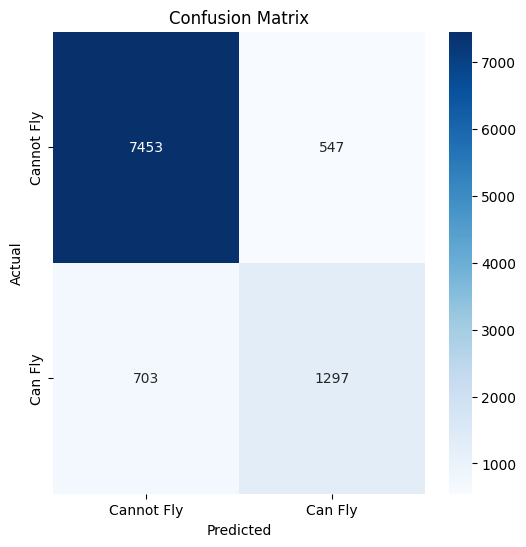

              precision    recall  f1-score   support

  Cannot Fly       0.91      0.93      0.92      8000
     Can Fly       0.70      0.65      0.67      2000

    accuracy                           0.88     10000
   macro avg       0.81      0.79      0.80     10000
weighted avg       0.87      0.88      0.87     10000



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Predict the test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Cannot Fly", "Can Fly"], yticklabels=["Cannot Fly", "Can Fly"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Cannot Fly", "Can Fly"]))

# Save the model
model.save('my_cifar10_model.h5')

* Predict labels for the test set.
* Generate a confusion matrix to visualize the performance of the model.
* Print a classification report showing both classes' precision, recall, F1 score, and accuracy.
* Save the trained model to a file for later use.



# Step 8: Plot Training History


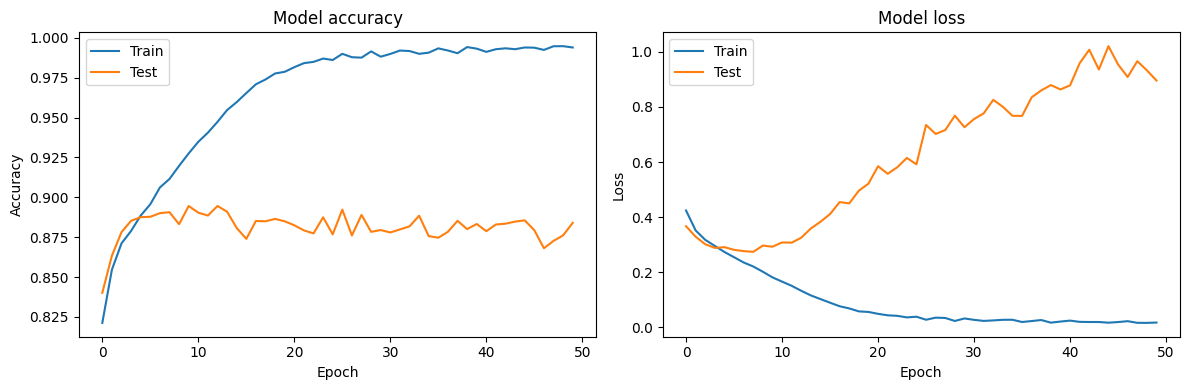

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

**Plot the training and validation accuracy and loss over the epochs to visualize the model's learning process.**

# Step 9: Visualize Predictions


Correctly Classified Images:


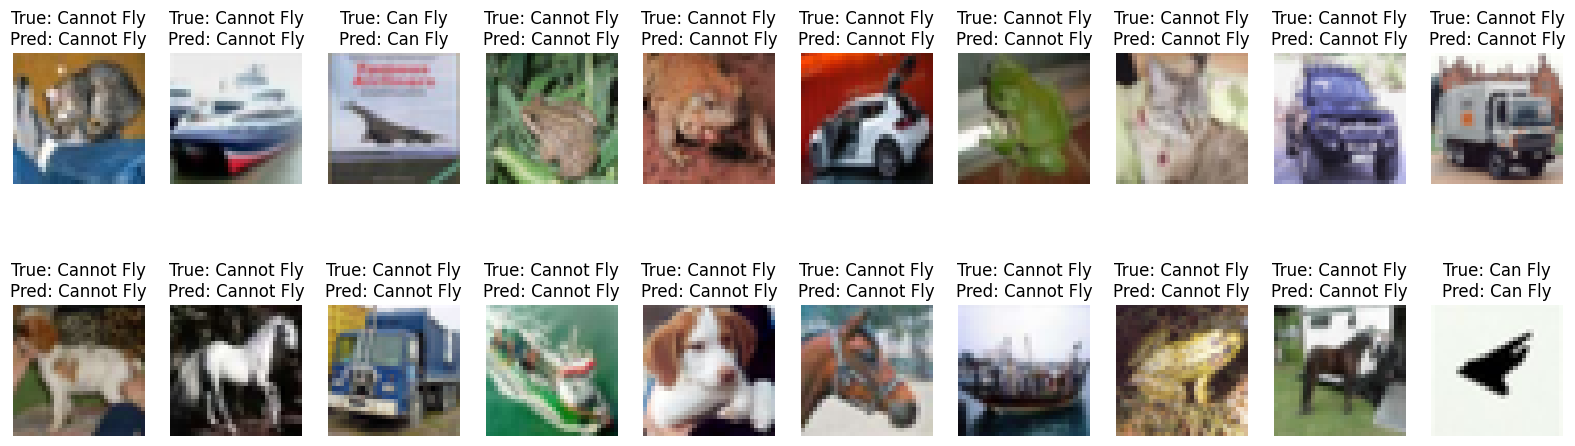

Incorrectly Classified Images:


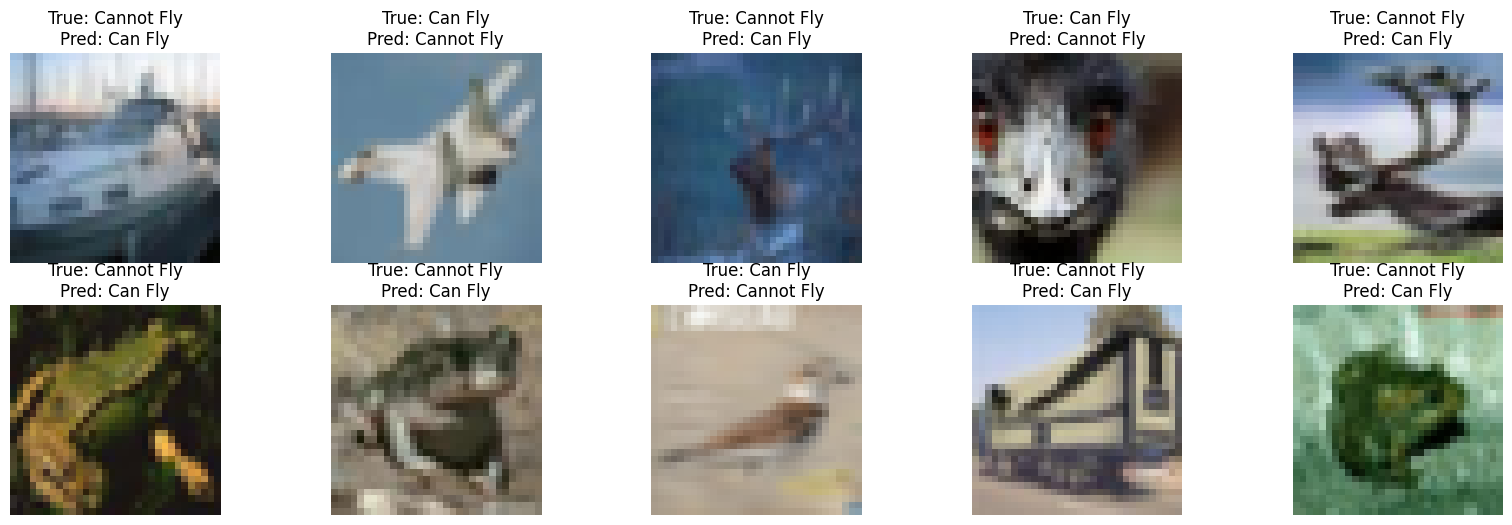

In [21]:
# Function to plot images with their predicted and true labels without using random
def plot_predictions(images, true_labels, pred_labels, class_names, class_indices, num_images=20):
    plt.figure(figsize=(20, 6))
    for i, idx in enumerate(class_indices[:num_images]):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[idx])
        plt.title(f"True: {class_names[true_labels[idx][0]]}\nPred: {class_names[pred_labels[idx][0]]}")
        plt.axis('off')
    plt.show()

# Define class names for better readability
class_names = {0: "Cannot Fly", 1: "Can Fly"}

# Assuming y_pred is defined somewhere else in your code
# y_pred = model.predict(x_test) # You need to run your model prediction here

# Manually select indices for specific classes
correct_indices = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

# Plot some correctly classified images
print("Correctly Classified Images:")
plot_predictions(x_test, y_test, y_pred, class_names, correct_indices, num_images=20)

# Plot some incorrectly classified images
print("Incorrectly Classified Images:")
plot_predictions(x_test, y_test, y_pred, class_names, incorrect_indices, num_images=10)


* Define a function to plot images with their predicted and true labels.
* Visualize some correctly and incorrectly classified images.



# Conclusion

*In this project, we successfully built and trained a Convolutional Neural Network (CNN) to classify images from the CIFAR10 dataset into "can fly" and "cannot fly" categories. We utilized data preprocessing techniques, designed a suitable model architecture, and trained the model using the CIFAR10 dataset. The model's performance was evaluated using a confusion matrix and classification report, and the results showed a reasonably accurate classification. By visualizing correctly and incorrectly classified images, we gained further insights into the model's performance. Overall, this project demonstrated the effectiveness of CNNs in image classification tasks and provided valuable experience in model training and evaluation.*